# Importing Libraries

In [1]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Reading the csv file and assining a variable

In [2]:
data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\rating.csv', encoding='utf-8')
data_traffic = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\traffic.csv', encoding='utf-8')
data_domain = pd.read_csv(r'C:\Users\user\OneDrive\Documents\10 Acadamy\domains_location.csv', encoding='utf-8')

In [3]:
def load_data(file):
    with open (file, 'r', encoding="utf-8") as f:
        data = json.load(f)
        return (data)
def write_data(file,data):
    with open (file, 'w', encoding='utf-8') as f:
        json.dump(data,f,indent=4)

In [4]:
cell_value = data.loc[5, 'title']
print(cell_value)

unga calls for humanitarian truce in israel-hamas war: how countries voted?


In [5]:

def remove_stops(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while " " in final:
        final = final.replace("  ", " ")
    return(final)


In [6]:
def clean_docs(docs):
    stops = stopwords.words("english")
    months= load_data("data/months.jason")
    stops = stops+months
    final= []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)
    

In [9]:
import difflib
from nltk.corpus import wordnet
def preprocess_text(text):
  text = text.lower()
  for char in string.punctuation:
    text = text.replace(char, "")
  return text

paragraph1_processed = preprocess_text(cell_value)
paragraph2_processed = preprocess_text(cell_value2)

sentence_diff = difflib.SequenceMatcher(None, cell_value.split(), cell_value2.split())
matched_sentences = sentence_diff.get_matching_blocks()

print("Similar Sentences:")
for block in matched_sentences:
  print(f"cell_value: {cell_value.split()[block[0]:block[1]]}")
  print(f"cell_value2: {cell_value2.split()[block[2]:block[3]]}\n")
def get_wordnet_similarity(word1, word2):
  wordnet.download('omw-1.1')
  synsets1 = wordnet.synsets(word1)
  synsets2 = wordnet.synsets(word2)
  if not synsets1 or not synsets2:
    return 0
  return synsets1[0].wup_similarity(synsets2[0])

for word1 in cell_value.split():
  for word2 in cell_value.split():
    similarity = get_wordnet_similarity(word1, word2)
    if similarity > 0.7:  # Adjust threshold for desired similarity level
      print(f"Similar Words: '{word1}' and '{word2}' (Similarity: {similarity:.2f})")

NameError: name 'cell_value2' is not defined

# Task-2:Simmilarity between Title and Article 

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from urllib.parse import urlparse
def extract_website(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc
data['website'] = data['url'].apply(extract_website)
row = 1
# Sample paragraphs
for row in range(100): 
    cell_value = data.loc[row, 'title']
    cell_value2 = data.loc[row, 'article']
    website = data.loc[row, 'website']
    
    tokens1 = word_tokenize(cell_value)
    tokens2 = word_tokenize(cell_value2)
    stop_words = set(stopwords.words('english'))
    filtered_tokens1 = [word for word in tokens1 if word.lower() not in stop_words]
    filtered_tokens2 = [word for word in tokens2 if word.lower() not in stop_words]
    
    similarity = nltk.jaccard_distance(set(filtered_tokens1), set(filtered_tokens2))
    
    print(website)
    print("Similarity:", 1 - similarity)

www.forbes.com
Similarity: 0.01969365426695846
www.channelnewsasia.com
Similarity: 0.07499999999999996
time.com
Similarity: 0.024630541871921152
phys.org
Similarity: 0.07058823529411762
www.digitaltrends.com
Similarity: 0.020231213872832332
www.aljazeera.com
Similarity: 0.01773049645390068
www.bbc.co.uk
Similarity: 0.016129032258064502
phys.org
Similarity: 0.021097046413502074
deadline.com
Similarity: 0.022831050228310557
www.euronews.com
Similarity: 0.0847457627118644
phys.org
Similarity: 0.03581267217630857
www.rt.com
Similarity: 0.03968253968253965
phys.org
Similarity: 0.015957446808510634
www.forbes.com
Similarity: 0.005714285714285672
www.forbes.com
Similarity: 0.01253918495297801
punchng.com
Similarity: 0.024539877300613466
www.aljazeera.com
Similarity: 0.014729950900163713
www.euronews.com
Similarity: 0.01572327044025157
www.channelnewsasia.com
Similarity: 0.043209876543209846
www.forbes.com
Similarity: 0.010482180293501009
www.channelnewsasia.com
Similarity: 0.06896551724137934

In [12]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuation = text.translate(translator)
    return text_without_punctuation

In [54]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuation = text.translate(translator)
    return text_without_punctuation

cell_value = data.loc[row, 'title']
new = remove_punctuation(cell_value)
print(new)
print(cell_value)

superstar chef yannick alléno brings refined french cuisine to pavyllon london
superstar chef yannick alléno brings refined french cuisine to pavyllon london


In [55]:
!pip install spacy

In [32]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.3 MB/s eta 0:00:10
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 774.0 kB/s eta 0:00:17
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     -- ------------------------------------- 0.7/12.8 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.2/12.8 MB 2.2 MB/s eta 0:00:06
     ---- ----------------------------------- 1.5/12.8 M

In [56]:
!pip install wordcloud

In [57]:
import warnings
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [58]:
new_value = data['title']
tokenized_doc_spacy = new_value[:100]
tokenized_doc_spacy[:1]

0    superstar chef yannick alléno brings refined f...
Name: title, dtype: object

In [64]:
nlp = spacy.load("en_core_web_sm")

In [65]:
stopwords = list(STOP_WORDS)

In [71]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuation ]
    mytokens = [ word for word in mytokens if len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [80]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))

def spacy_tokenizer(sentence, stopwords, punctuation):
    mytokens = nlp(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stopwords and word not in punctuation]
    mytokens = [word for word in mytokens if len(word) > 3]
    mytokens = " ".join(mytokens)
    return mytokens

In [83]:
def spacy_tokenizer(sentence, stopwords, punctuation):
    mytokens = nlp(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stopwords and word not in punctuation]
    mytokens = [word for word in mytokens if len(word) > 3]
    mytokens = " ".join(mytokens)
    return mytokens

doc_clean = [spacy_tokenizer(doc, stopwords, punctuation).split() for doc in list_of_docs]

In [84]:
#doc_clean = [spacy_tokenizer(doc).split() for doc in list_of_docs]

In [85]:
print(doc_clean[:1])

[['superstar', 'chef', 'yannick', 'alléno', 'bring', 'refined', 'french', 'cuisine', 'pavyllon', 'london']]


In [86]:
words = corpora.Dictionary(doc_clean)
corpus = [words.doc2bow(doc) for doc in doc_clean]

# LDA Modeling

In [87]:
lda_model = LdaModel(corpus=corpus, id2word=words, num_topics=5, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')

In [92]:
print(lda_model.print_topics())

[(0, '0.022*"maldive" + 0.019*"2023" + 0.013*"specie" + 0.013*"amphibian" + 0.013*"president" + 0.013*"base" + 0.013*"resource" + 0.010*"china" + 0.010*"world" + 0.010*"elect"'), (1, '0.010*"2023" + 0.010*"cobalt" + 0.010*"malawi" + 0.010*"london" + 0.010*"flight" + 0.010*"ocean" + 0.010*"research" + 0.006*"general" + 0.005*"launch" + 0.005*"asia"'), (2, '0.014*"graphite" + 0.009*"export" + 0.009*"release" + 0.009*"project" + 0.009*"realise" + 0.009*"race" + 0.009*"control" + 0.009*"miner" + 0.009*"china" + 0.009*"hotel"'), (3, '0.026*"maldive" + 0.022*"indian" + 0.014*"muizzu" + 0.014*"president" + 0.009*"african" + 0.009*"incoming" + 0.009*"military" + 0.009*"list" + 0.009*"travel" + 0.009*"without"'), (4, '0.009*"country" + 0.009*"life" + 0.009*"take" + 0.009*"birthday" + 0.009*"share" + 0.009*"light" + 0.009*"photo" + 0.009*"india" + 0.009*"inside" + 0.009*"daughter"')]


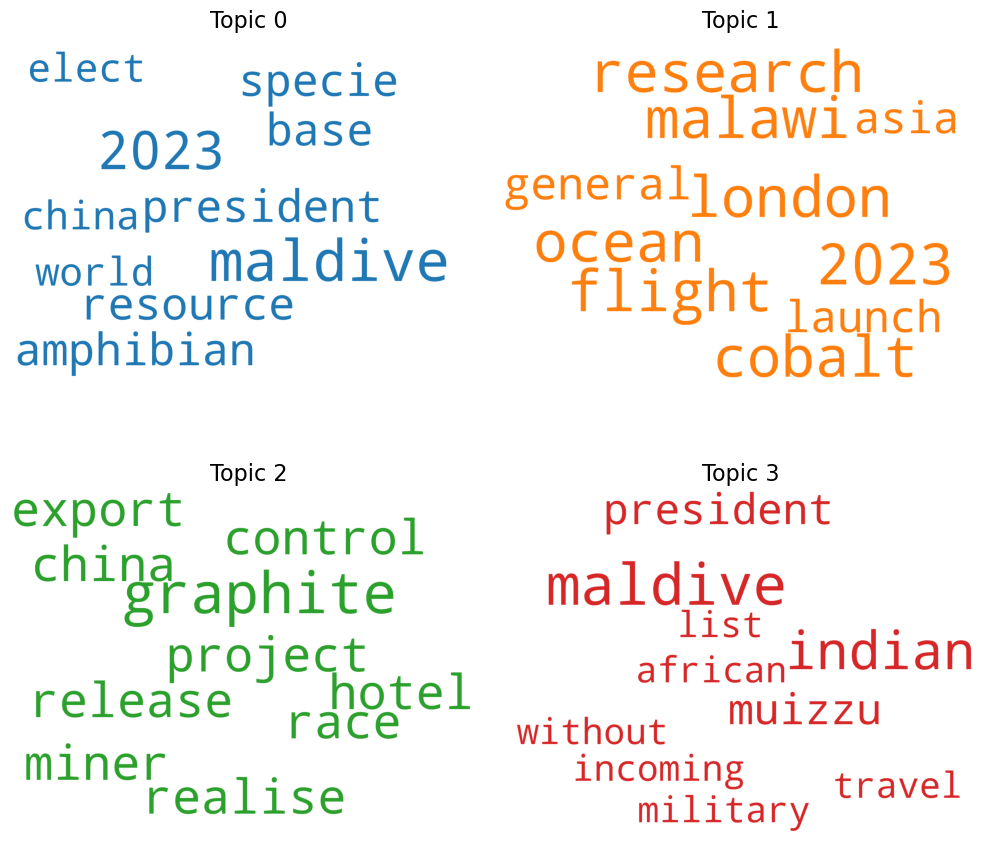

In [93]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')import nltk
nltk.download('wordnet')

In [66]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [50]:
title = data['title']
title_df = title[:100]
tokenized_doc = title_df.str.replace("[^a-zA-Z#]", " ")
title_df.shape

(100,)

AttributeError: 'list' object has no attribute 'apply'

In [68]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()  # Assuming the title column contains text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

lam_data = data['title'] = data['title'].apply(lemmatize_text)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features= 1000, max_df = 0.5, smooth_idf=True)
vector =tfidf.fit_transform(lam_data)

X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.566023,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
58352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
58353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.761894,0.0
58354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [71]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [72]:
svd_model.components_.shape

(5, 1000)

In [3]:
!pip install pyldavis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------------------- 0.0/2.6 MB 653.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.6 MB 657.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.6 MB 787.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.6 MB 1.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.6 MB 1.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.6 MB 1.1 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/2.6 MB 1.1 MB/s eta

# Catagorizing titles in to known Catagory

In [41]:
data = data.head(100)
categories = {
    "Breaking News": ["breaking news", "urgent", "alert"],
    "Politics": ["politics", "election", "government"],
    "World News": ["world news", "international", "global"],
    "Business/Finance": ["business", "finance", "economy"],
    "Technology": ["technology", "tech", "innovation"],
    "Science": ["science", "scientific", "research"],
    "Health": ["health", "medical", "wellness"],
    "Entertainment": ["entertainment", "celebrity", "movies"],
    "Sports": ["sports", "athletics", "games"],
    "Environment": ["environment", "climate", "green"],
    "Crime": ["crime", "criminal", "law"],
    "Education": ["education", "school", "learning"],
    "Weather": ["weather", "forecast", "meteorology"]
}
def categorize_title(title):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in title.lower():
                return category
    return "Other"  # If no category matches

data['category'] = data['title'].apply(categorize_title)
print(data[['title', 'category']])

                                                title       category
0   superstar chef yannick alléno brings refined f...          Other
1   nice claim top spot in ligue 1 with late win a...          Other
2   amphibians are the world’s most vulnerable spe...          Other
3               image: rusty red waters in madagascar          Other
4   everything leaving max (formerly hbo max) in n...          Other
5   unga calls for humanitarian truce in israel-ha...          Other
6   malawi heatwave warning issued as temperatures...          Crime
7   researcher scans tropical forest with mixed-re...        Science
8   ‘taylor swift: the eras tour’ movie: tickets, ...          Other
9   marine le pen found guilty of defamation after...          Other
10  tiny and mysterious: research sheds light on s...        Science
11  russian marine scientists to conduct african r...        Science
12  how animal traits have shaped the journey of s...          Other
13               investing in girl

In [29]:
sorted_data = data.sort_values(by='category')

print(sorted_data[['title', 'category']])

                                                title       category
17  red alert for the ev market: china puts curb o...  Breaking News
6   malawi heatwave warning issued as temperatures...          Crime
14  setting intentional climate solution goals as ...    Environment
0   superstar chef yannick alléno brings refined f...          Other
16  ‘kids whose insides are destroyed’: the return...          Other
15  full list: davido, rema win big at 2023 trace ...          Other
13               investing in girls and their futures          Other
12  how animal traits have shaped the journey of s...          Other
18  south star eyes faster ramp up of brazil graph...          Other
9   marine le pen found guilty of defamation after...          Other
5   unga calls for humanitarian truce in israel-ha...          Other
4   everything leaving max (formerly hbo max) in n...          Other
3               image: rusty red waters in madagascar          Other
2   amphibians are the world’s mos

# Which website reported the most diverse topic

In [30]:
diversity_counts = data.groupby('website')['category'].nunique()
sorted_diversity = diversity_counts.sort_values(ascending=False)
print(sorted_diversity)

website
phys.org                   2
www.euronews.com           2
www.forbes.com             2
deadline.com               1
punchng.com                1
time.com                   1
www.aljazeera.com          1
www.bbc.co.uk              1
www.channelnewsasia.com    1
www.digitaltrends.com      1
www.rt.com                 1
Name: category, dtype: int64


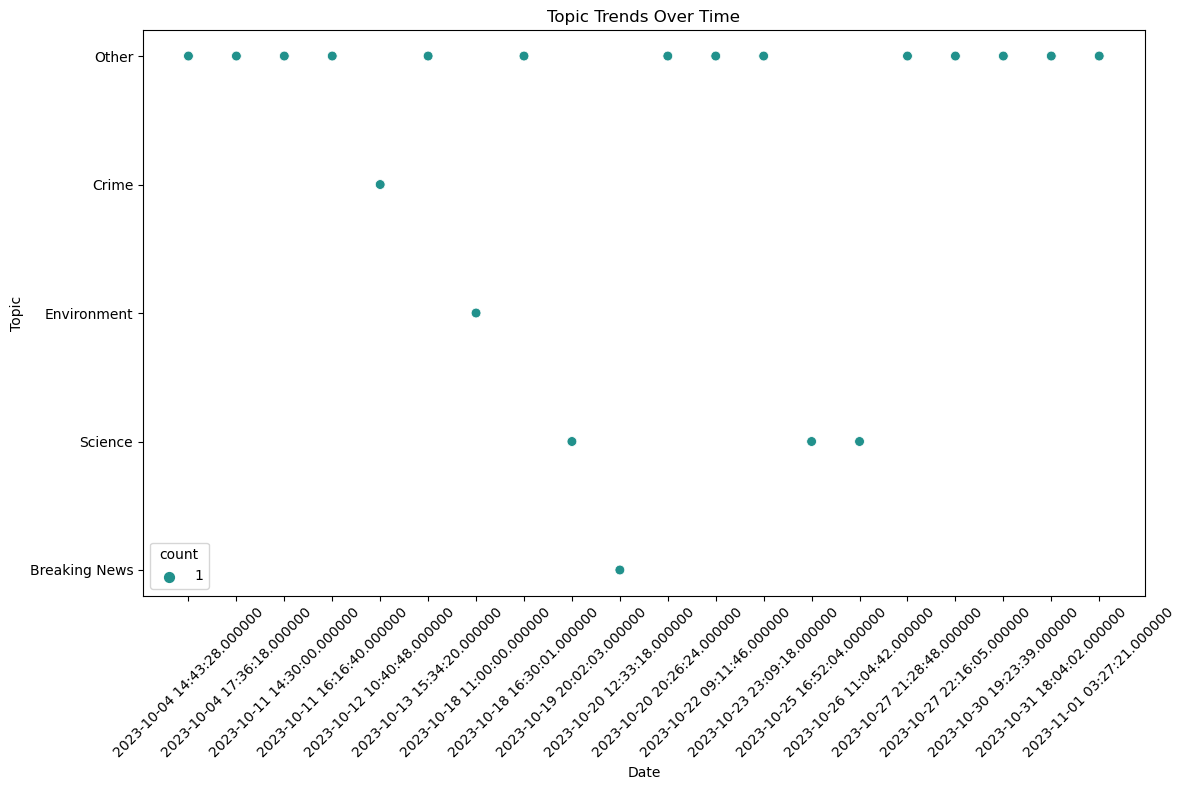

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_trends = data.groupby(['published_at', 'category']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))
sns.scatterplot(data=topic_trends, x='published_at', y='category', hue='count', size='count', sizes=(50, 200), palette='viridis', legend='brief')
plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()